# 第１章

# ニューラルネットワークの推論

In [5]:
!git clone https://github.com/oreilly-japan/deep-learning-from-scratch-2

Cloning into 'deep-learning-from-scratch-2'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 339 (delta 10), reused 15 (delta 5), pack-reused 303
Receiving objects: 100% (339/339), 7.65 MiB | 1.20 MiB/s, done.
Resolving deltas: 100% (184/184), done.


In [14]:
import numpy as np

class Sigmoid: #Sigmoidレイヤ
    def __init__(self):
        self.params = []
    
    def forward(self, x):
        return 1/(1 + np.exp(-x))

In [15]:
class Affine: #全結合層（Affineレイヤ）
    def __init__(self,W,b):
        self.params = [W,b]
        
    def forward(self,x):
        W, b = self.params
        out = np.dot(x,W) + b
        return out

In [16]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I,H,O = input_size,hidden_size,output_size
        
        #重みとバイアスの初期化
        W1 = np.random.randn(I,H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H,O)
        b2 = np.random.randn(O)
        
        #レイヤの生成
        self.layers = [
            Affine(W1,b1),
            Sigmoid(),
            Affine(W2,b2)
        ]
        
        #全ての重みをリストにまとめる
        self.params = []
        for layer in self.layers:
            self.params += layer.params
            
    def predict(self,x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

In [18]:
x = np.random.randn(10,2)
model = TwoLayerNet(2,4,3)
s = model.predict(x)
s

array([[-1.0676655 ,  1.46536514,  2.16719747],
       [-1.05298842,  1.38675641,  2.25795474],
       [-1.09469297,  0.87344375,  1.13897526],
       [-1.13220104,  1.45463661,  1.92958958],
       [-1.12278291,  1.65630698,  2.3124131 ],
       [-1.04768246,  1.24015873,  1.9164245 ],
       [-1.05765728,  1.36171529,  2.33909995],
       [-1.05604997,  1.19790567,  1.46924493],
       [-1.12536251,  1.70048007,  2.42668458],
       [-1.05985588,  1.35475672,  2.36225995]])

# ニューラルネットワークの学習

ソフトマックス関数  
$$
y = \frac{\exp(s_k)}{\sum_{i=1}^n \exp(s_i)}
$$
の出力の各要素は0.0~1.0の値をとるため、**確率として解釈できる。**

交差エントロピー誤差は
$$
L = - \sum_{k} t_k \log y_k
$$
で表される。t_kはk番目のクラスの教師ラベル。  
また、ミニバッチ処理を考慮した時、交差エントロピー誤差は以下のように表される。
$$
L = - \frac{1}{N} \sum_{n} \sum_{k} t_{nk} \log y_{nk}
$$
N個分のデータの損失の合計をNで割って平均を取っている。こうすることでミニバッチのサイズに関係なく統一した指標が得られる。

**勾配**:ベクトルの各要素に関する微分をまとめたもの  
$$
\frac{\partial L}{\partial x} = (\frac{\partial L}{\partial x_1},\frac{\partial L}{\partial x_2},...,\frac{\partial L}{\partial x_n})
$$
行列Wの勾配も同じように求められる。ここで、行列Wと勾配$\frac{\partial L}{\partial W}$の形が同じであるという性質を利用することで、パラメータの更新作業やチェインルールの実装を簡単にできる。

# チェインルール（連鎖律）
$$\frac{\partial z}{\partial x} = \frac{\partial z}{\partial y} \frac{\partial y}{\partial x}$$
これを利用することで、どんな複雑な関数でも微分を求めることができる（各函数の局所的な微分を計算してその積をとる）。これが**誤差逆伝播法**の鍵。

# 計算グラフ
https://qiita.com/yakof11/items/5d37042f689760515072

In [22]:
# Repeat Node
D, N = 8,7
#順伝播
x = np.random.randn(1,D)
y = np.repeat(x,N, axis=0) #縦にN個コピーする

#逆伝播
dy = np.random.randn(N,D)
dx = np.sum(dy, axis=0, keepdims=True) #次元を維持する

In [24]:
print(x)
print(y)
print(dy)
print(dx)

[[ 0.58785473 -1.11960144  0.55065244 -0.85522355 -0.02908249 -0.05181744
   0.92306834 -0.54943566]]
[[ 0.58785473 -1.11960144  0.55065244 -0.85522355 -0.02908249 -0.05181744
   0.92306834 -0.54943566]
 [ 0.58785473 -1.11960144  0.55065244 -0.85522355 -0.02908249 -0.05181744
   0.92306834 -0.54943566]
 [ 0.58785473 -1.11960144  0.55065244 -0.85522355 -0.02908249 -0.05181744
   0.92306834 -0.54943566]
 [ 0.58785473 -1.11960144  0.55065244 -0.85522355 -0.02908249 -0.05181744
   0.92306834 -0.54943566]
 [ 0.58785473 -1.11960144  0.55065244 -0.85522355 -0.02908249 -0.05181744
   0.92306834 -0.54943566]
 [ 0.58785473 -1.11960144  0.55065244 -0.85522355 -0.02908249 -0.05181744
   0.92306834 -0.54943566]
 [ 0.58785473 -1.11960144  0.55065244 -0.85522355 -0.02908249 -0.05181744
   0.92306834 -0.54943566]]
[[-0.65708691 -1.16535615 -0.39284     2.73489193 -0.35537709  0.37913158
   0.18444655  0.2002764 ]
 [ 0.22305179  0.34155229 -0.73074465 -0.07484864 -2.02158803 -1.21419155
  -1.1562481   

In [27]:
# Sum Node: N by D の行列を全部足して1 by Dにする（axis=0)
#Repeatの逆函数
D, N = 8,7
#順伝播
x = np.random.randn(N,D)
y = np.sum(x, axis=0, keepdims=True) 
#逆伝播
dx = np.random.randn(1,D)
dy = np.repeat(x,N, axis=0) 
print(x)
print(y)
print(dy)
print(dx)

[[ 1.41456122 -0.06094513 -0.38063597 -0.42477167  1.42323665  1.48695007
  -0.84881361  0.04285974]
 [-1.0415521   1.81250005  0.5031391   0.17947383  0.18098423  0.34847398
  -0.3679867   0.52299577]
 [-1.0150011  -0.96660296 -0.70887033 -0.87981653  0.16740002  0.78524512
  -0.71279231 -1.25643943]
 [-0.15927886 -1.15301545  0.41502255 -2.13454305  0.97361429 -0.2645148
   1.45879438  0.27172683]
 [-1.46635147 -0.13159958  0.38298735 -0.48653421 -1.53103636 -0.71796216
  -0.67629011 -0.00351644]
 [-0.88295291 -1.82689613 -1.13129955 -0.44896269 -0.47256679 -0.04803861
  -1.00128875  1.15750781]
 [ 0.55360703  0.73081137  0.46332141 -1.4475068   1.57973127  0.27490717
  -2.17975191  1.08196624]]
[[-2.5969682  -1.59574783 -0.45633544 -5.64266112  2.32136332  1.86506077
  -4.32812902  1.81710051]]
[[ 1.41456122 -0.06094513 -0.38063597 -0.42477167  1.42323665  1.48695007
  -0.84881361  0.04285974]
 [ 1.41456122 -0.06094513 -0.38063597 -0.42477167  1.42323665  1.48695007
  -0.84881361  0

In [29]:
#MatMul Node:行列の掛け算
class MatMul:
    def __init__(self,W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None
    
    def forward(self,x):
        W = self.params
        out = np.dot(x,W)
        self.x = x
        return out
    
    def backward(self,dout):
        W, = self.params
        dx = np.dot(dout,W.T)
        dW = np.dot(self.x.T,dout)
        self.grads[0][...] = dW #3点リーダによる「深いコピー」
        return dx

# 勾配の導出と逆伝播の実装
Sigmoid関数
$$ y = \frac{1}{1+\exp(-x)}$$
その微分
$$
\frac{\partial y}{\partial x} = y(1-x)
$$
これにより逆伝播を実装できる。

In [1]:
class Sigmoid:
    def __init__(self):
        self.params, self.grads = [],[]
        self.put = None
    
    def forward(self,x):
        out = 1/(1 + np.exp(-x))
        self.out = out
        return out
    
    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx

In [2]:
class Affine:
    def __init__(self,W,b):
        self.params = [W,b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = none
        
    def forward(self,x):
        W,b = self.params
        out = np.dot(x,W) + b
        self.x = x
        return out
    
    def backward(self,dout):
        W,b = self.params
        dx = np.dot(dout,W.T)
        dW = np.dot(self,x.T,dout)
        db = np.sum(dout,axis=0)
        
        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx
        

# 確率的勾配降下法

In [3]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
    
    def update(self,params,grads):
        for i in range(len(params)):
            params[i] = self.lr * grads[i]

# ニューラルネットワークで問題を解く

In [6]:
from dataset import spiral
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
x,t = spiral.load_data()
print("x", x.shape)
print("t", t.shape)

x (300, 2)
t (300, 3)


In [22]:
from common.layers import Affine, Sigmoid, SoftmaxWithLoss

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I,H,O = input_size,hidden_size,output_size
        
        #重みとバイアスの初期化
        W1 = 0.01 * np.random.randn(I,H) #重みを小さなランダム値にしておくことで学習しやすくなる
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)
        
        #レイヤの生成
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2,b2)
        ]
        self.loss_layer = SoftmaxWithLoss()
        
        #全ての重みと勾配をリストにまとめる
        self.params, self.grads = [],[]
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads
            
    def predict(self,x):
        for layer in self.layers:
            x = layer.forward(x)
        return x
        
    def forward(self,x,t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score,t)
        return loss
        
    def backward(self,dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout
        

| epoch 1 | iter 10 / 10 | loss 1.10
| epoch 2 | iter 10 / 10 | loss 1.12
| epoch 3 | iter 10 / 10 | loss 1.10
| epoch 4 | iter 10 / 10 | loss 1.08
| epoch 5 | iter 10 / 10 | loss 1.18
| epoch 6 | iter 10 / 10 | loss 1.22
| epoch 7 | iter 10 / 10 | loss 1.24
| epoch 8 | iter 10 / 10 | loss 1.13
| epoch 9 | iter 10 / 10 | loss 1.12
| epoch 10 | iter 10 / 10 | loss 1.20
| epoch 11 | iter 10 / 10 | loss 1.22
| epoch 12 | iter 10 / 10 | loss 1.22
| epoch 13 | iter 10 / 10 | loss 1.10
| epoch 14 | iter 10 / 10 | loss 1.12
| epoch 15 | iter 10 / 10 | loss 1.24
| epoch 16 | iter 10 / 10 | loss 1.32
| epoch 17 | iter 10 / 10 | loss 1.16
| epoch 18 | iter 10 / 10 | loss 1.10
| epoch 19 | iter 10 / 10 | loss 1.13
| epoch 20 | iter 10 / 10 | loss 1.12
| epoch 21 | iter 10 / 10 | loss 1.06
| epoch 22 | iter 10 / 10 | loss 1.42
| epoch 23 | iter 10 / 10 | loss 1.11
| epoch 24 | iter 10 / 10 | loss 1.17
| epoch 25 | iter 10 / 10 | loss 1.06
| epoch 26 | iter 10 / 10 | loss 1.24
| epoch 27 | iter 10 

| epoch 685 | iter 10 / 10 | loss 0.55
| epoch 686 | iter 10 / 10 | loss 0.70
| epoch 687 | iter 10 / 10 | loss 0.57
| epoch 688 | iter 10 / 10 | loss 0.70
| epoch 689 | iter 10 / 10 | loss 0.76
| epoch 690 | iter 10 / 10 | loss 0.65
| epoch 691 | iter 10 / 10 | loss 0.88
| epoch 692 | iter 10 / 10 | loss 0.76
| epoch 693 | iter 10 / 10 | loss 0.72
| epoch 694 | iter 10 / 10 | loss 0.65
| epoch 695 | iter 10 / 10 | loss 0.86
| epoch 696 | iter 10 / 10 | loss 0.68
| epoch 697 | iter 10 / 10 | loss 0.61
| epoch 698 | iter 10 / 10 | loss 0.68
| epoch 699 | iter 10 / 10 | loss 0.63
| epoch 700 | iter 10 / 10 | loss 0.54
| epoch 701 | iter 10 / 10 | loss 0.65
| epoch 702 | iter 10 / 10 | loss 0.53
| epoch 703 | iter 10 / 10 | loss 0.74
| epoch 704 | iter 10 / 10 | loss 0.68
| epoch 705 | iter 10 / 10 | loss 0.75
| epoch 706 | iter 10 / 10 | loss 0.52
| epoch 707 | iter 10 / 10 | loss 0.61
| epoch 708 | iter 10 / 10 | loss 0.68
| epoch 709 | iter 10 / 10 | loss 0.56
| epoch 710 | iter 10 / 1

| epoch 1275 | iter 10 / 10 | loss 0.34
| epoch 1276 | iter 10 / 10 | loss 0.28
| epoch 1277 | iter 10 / 10 | loss 0.16
| epoch 1278 | iter 10 / 10 | loss 0.18
| epoch 1279 | iter 10 / 10 | loss 0.29
| epoch 1280 | iter 10 / 10 | loss 0.32
| epoch 1281 | iter 10 / 10 | loss 0.23
| epoch 1282 | iter 10 / 10 | loss 0.35
| epoch 1283 | iter 10 / 10 | loss 0.21
| epoch 1284 | iter 10 / 10 | loss 0.22
| epoch 1285 | iter 10 / 10 | loss 0.23
| epoch 1286 | iter 10 / 10 | loss 0.24
| epoch 1287 | iter 10 / 10 | loss 0.19
| epoch 1288 | iter 10 / 10 | loss 0.27
| epoch 1289 | iter 10 / 10 | loss 0.25
| epoch 1290 | iter 10 / 10 | loss 0.34
| epoch 1291 | iter 10 / 10 | loss 0.33
| epoch 1292 | iter 10 / 10 | loss 0.34
| epoch 1293 | iter 10 / 10 | loss 0.15
| epoch 1294 | iter 10 / 10 | loss 0.30
| epoch 1295 | iter 10 / 10 | loss 0.20
| epoch 1296 | iter 10 / 10 | loss 0.26
| epoch 1297 | iter 10 / 10 | loss 0.29
| epoch 1298 | iter 10 / 10 | loss 0.25
| epoch 1299 | iter 10 / 10 | loss 0.25


| epoch 1705 | iter 10 / 10 | loss 0.20
| epoch 1706 | iter 10 / 10 | loss 0.19
| epoch 1707 | iter 10 / 10 | loss 0.25
| epoch 1708 | iter 10 / 10 | loss 0.23
| epoch 1709 | iter 10 / 10 | loss 0.11
| epoch 1710 | iter 10 / 10 | loss 0.27
| epoch 1711 | iter 10 / 10 | loss 0.16
| epoch 1712 | iter 10 / 10 | loss 0.11
| epoch 1713 | iter 10 / 10 | loss 0.17
| epoch 1714 | iter 10 / 10 | loss 0.23
| epoch 1715 | iter 10 / 10 | loss 0.16
| epoch 1716 | iter 10 / 10 | loss 0.15
| epoch 1717 | iter 10 / 10 | loss 0.23
| epoch 1718 | iter 10 / 10 | loss 0.30
| epoch 1719 | iter 10 / 10 | loss 0.24
| epoch 1720 | iter 10 / 10 | loss 0.16
| epoch 1721 | iter 10 / 10 | loss 0.14
| epoch 1722 | iter 10 / 10 | loss 0.15
| epoch 1723 | iter 10 / 10 | loss 0.13
| epoch 1724 | iter 10 / 10 | loss 0.12
| epoch 1725 | iter 10 / 10 | loss 0.18
| epoch 1726 | iter 10 / 10 | loss 0.17
| epoch 1727 | iter 10 / 10 | loss 0.17
| epoch 1728 | iter 10 / 10 | loss 0.18
| epoch 1729 | iter 10 / 10 | loss 0.11


| epoch 2199 | iter 10 / 10 | loss 0.17
| epoch 2200 | iter 10 / 10 | loss 0.16
| epoch 2201 | iter 10 / 10 | loss 0.22
| epoch 2202 | iter 10 / 10 | loss 0.21
| epoch 2203 | iter 10 / 10 | loss 0.08
| epoch 2204 | iter 10 / 10 | loss 0.21
| epoch 2205 | iter 10 / 10 | loss 0.10
| epoch 2206 | iter 10 / 10 | loss 0.13
| epoch 2207 | iter 10 / 10 | loss 0.13
| epoch 2208 | iter 10 / 10 | loss 0.16
| epoch 2209 | iter 10 / 10 | loss 0.15
| epoch 2210 | iter 10 / 10 | loss 0.18
| epoch 2211 | iter 10 / 10 | loss 0.12
| epoch 2212 | iter 10 / 10 | loss 0.16
| epoch 2213 | iter 10 / 10 | loss 0.18
| epoch 2214 | iter 10 / 10 | loss 0.14
| epoch 2215 | iter 10 / 10 | loss 0.14
| epoch 2216 | iter 10 / 10 | loss 0.11
| epoch 2217 | iter 10 / 10 | loss 0.04
| epoch 2218 | iter 10 / 10 | loss 0.14
| epoch 2219 | iter 10 / 10 | loss 0.13
| epoch 2220 | iter 10 / 10 | loss 0.19
| epoch 2221 | iter 10 / 10 | loss 0.10
| epoch 2222 | iter 10 / 10 | loss 0.11
| epoch 2223 | iter 10 / 10 | loss 0.20


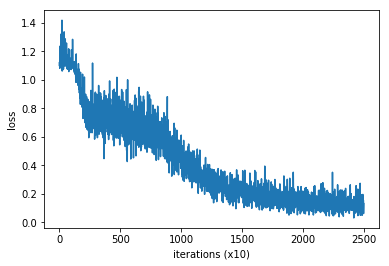

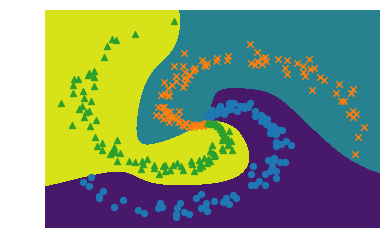

In [30]:
import numpy as np
from common.optimizer import SGD

#ハイパーパラメータ設定
max_epoch = 2500
batch_size = 30
hidden_size = 10
learning_rate = 1.0

#データの読み込み、モデルとオプティマイザの生成
x,t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

#学習で使用する変数
data_size = len(x)
max_iters = data_size//batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    #データのシャッフル
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]
    
    for iters in range(max_iters):
        batch_x = x[iters * batch_size:(iters+1)*batch_size]
        batch_t = t[iters * batch_size:(iters+1)*batch_size]
    
    #勾配を求めパラメータ更新
    loss = model.forward(batch_x,batch_t)
    model.backward()
    optimizer.update(model.params, model.grads)
    
    total_loss += loss
    loss_count += 1
    
    #定期的に学習結果を出力
    if (iters+1) % 10 == 0:
        avg_loss = total_loss/loss_count
        print("| epoch %d | iter %d / %d | loss %.2f" %(epoch+1,iters+1,max_iters, avg_loss))
        loss_list.append(avg_loss)
        total_loss, loss_count = 0,0
        

# 学習結果のプロット
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('iterations (x10)')
plt.ylabel('loss')
plt.show()

# 境界領域のプロット
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

# データ点のプロット
x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

| epoch 1 |  iter 10 / 10 | loss 1.13
| epoch 2 |  iter 10 / 10 | loss 1.13
| epoch 3 |  iter 10 / 10 | loss 1.12
| epoch 4 |  iter 10 / 10 | loss 1.12
| epoch 5 |  iter 10 / 10 | loss 1.11
| epoch 6 |  iter 10 / 10 | loss 1.14
| epoch 7 |  iter 10 / 10 | loss 1.16
| epoch 8 |  iter 10 / 10 | loss 1.11
| epoch 9 |  iter 10 / 10 | loss 1.12
| epoch 10 |  iter 10 / 10 | loss 1.13
| epoch 11 |  iter 10 / 10 | loss 1.12
| epoch 12 |  iter 10 / 10 | loss 1.11
| epoch 13 |  iter 10 / 10 | loss 1.09
| epoch 14 |  iter 10 / 10 | loss 1.08
| epoch 15 |  iter 10 / 10 | loss 1.04
| epoch 16 |  iter 10 / 10 | loss 1.03
| epoch 17 |  iter 10 / 10 | loss 0.96
| epoch 18 |  iter 10 / 10 | loss 0.92
| epoch 19 |  iter 10 / 10 | loss 0.92
| epoch 20 |  iter 10 / 10 | loss 0.87
| epoch 21 |  iter 10 / 10 | loss 0.85
| epoch 22 |  iter 10 / 10 | loss 0.82
| epoch 23 |  iter 10 / 10 | loss 0.79
| epoch 24 |  iter 10 / 10 | loss 0.78
| epoch 25 |  iter 10 / 10 | loss 0.82
| epoch 26 |  iter 10 / 10 | loss 

| epoch 286 |  iter 10 / 10 | loss 0.11
| epoch 287 |  iter 10 / 10 | loss 0.11
| epoch 288 |  iter 10 / 10 | loss 0.12
| epoch 289 |  iter 10 / 10 | loss 0.11
| epoch 290 |  iter 10 / 10 | loss 0.11
| epoch 291 |  iter 10 / 10 | loss 0.11
| epoch 292 |  iter 10 / 10 | loss 0.11
| epoch 293 |  iter 10 / 10 | loss 0.11
| epoch 294 |  iter 10 / 10 | loss 0.11
| epoch 295 |  iter 10 / 10 | loss 0.12
| epoch 296 |  iter 10 / 10 | loss 0.11
| epoch 297 |  iter 10 / 10 | loss 0.12
| epoch 298 |  iter 10 / 10 | loss 0.11
| epoch 299 |  iter 10 / 10 | loss 0.11
| epoch 300 |  iter 10 / 10 | loss 0.11


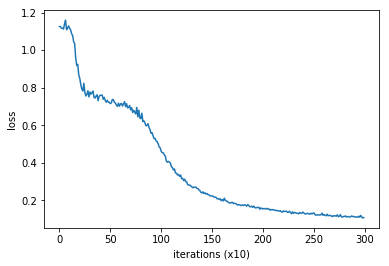

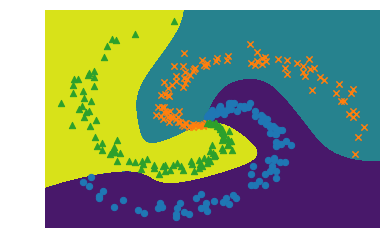

In [28]:
# coding: utf-8
import sys
sys.path.append('..')  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from common.optimizer import SGD
from dataset import spiral
import matplotlib.pyplot as plt


# ハイパーパラメータの設定
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

# 学習で使用する変数
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    # データのシャッフル
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]

    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]

        # 勾配を求め、パラメータを更新
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)

        total_loss += loss
        loss_count += 1

        # 定期的に学習経過を出力
        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print('| epoch %d |  iter %d / %d | loss %.2f'
                  % (epoch + 1, iters + 1, max_iters, avg_loss))
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0


# 学習結果のプロット
plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('iterations (x10)')
plt.ylabel('loss')
plt.show()

# 境界領域のプロット
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

# データ点のプロット
x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()